In [18]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [19]:
def plotSIR(t, y):
    group = ['S', 'I', 'R']
    colors = ['blue', 'red', 'green']
    N = np.sum(y[0])
    for i in range(3):
        plt.plot(t, y[:, i], label=group[i], color=colors[i])
    plt.plot(t, np.ones(len(t))*N, '--', color='black')

    ax = plt.gca()
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.axhline(y=0, color='black', linewidth=1.0)
    ax.axvline(x=0, color='black', linewidth=1.0)

    xticks = ax.get_xticks().tolist()
    yticks = ax.get_yticks().tolist()
    xticks = [i for i in xticks if i>0]
    yticks = [i for i in yticks if i>0]

    ax.set_xticks(xticks)
    ax.set_yticks(yticks)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.spines['bottom'].set_position(('data', 0))
    ax.spines['left'].set_position(('data', 0))
    
    ax.set_ylim(top=N)
    ax.set_xlim(right=t[-1])
    
    plt.xlabel('Time (arbitrary units)')
    plt.ylabel('SIR population')
    
    plt.grid(True)
    plt.legend(loc='right')
    plt.show()

In [20]:
def dydt_2regions(y, t, N, epsilon, beta, gamma, delta):  # y = [S1, I1, R1, S2, R2, R2]
    S1, I1, R1, S2, I2, R2 = y
    N1 = N*(1+epsilon)/2
    N2 = N*(1-epsilon)/2
    beta1 = beta*(1+epsilon)
    beta2 = beta*(1-epsilon)
    return np.array([-beta1*S1*I1/N1-delta*S1*I2/N2, beta1*S1*I1/N1-gamma*I1+delta*S1*I2/N2, gamma*I1, 
                    -beta2*S2*I2/N2-delta*S2*I1/N1, beta2*S2*I2/N2-gamma*I2+delta*S2*I1/N1, gamma*I2])

# epsilon = 0, delta = 0.001일때

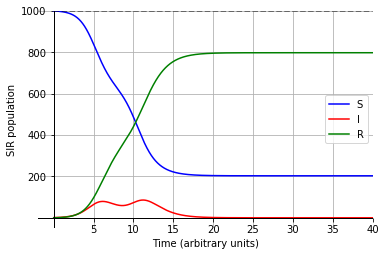

In [21]:
N = 1000
ti, tf = 0, 40
epsilon = 0
yi = np.array([N*(1+epsilon)/2-1, 1, 0, N*(1-epsilon)/2, 0, 0])

h = 0.01
t = np.arange(ti, tf+h, h)
y = odeint(dydt_2regions, yi, t, args=(N, epsilon, 1.999, 1, 0.001))  # N, epsilon, beta, gamma, delta
plotSIR(t, y[:, 3:]+y[:, :3])

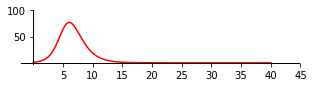

In [22]:
plt.figure(figsize=(5, 1))
plt.plot(t, y[:, 1], color='red')
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_visible(False)
ax.axhline(y=0, color='black', linewidth=1.0)
ax.axvline(x=0, color='black', linewidth=1.0)

xticks = ax.get_xticks().tolist()
yticks = ax.get_yticks().tolist()
xticks = [i for i in xticks if i>0]
yticks = [i for i in yticks if i>0]

ax.set_xticks(xticks)
ax.set_yticks(yticks)

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))

plt.show()

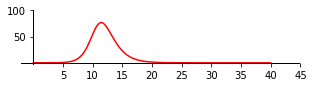

In [23]:
plt.figure(figsize=(5, 1))
plt.plot(t, y[:, 4], color='red')
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_visible(False)
ax.axhline(y=0, color='black', linewidth=1.0)
ax.axvline(x=0, color='black', linewidth=1.0)

xticks = ax.get_xticks().tolist()
yticks = ax.get_yticks().tolist()
xticks = [i for i in xticks if i>0]
yticks = [i for i in yticks if i>0]

ax.set_xticks(xticks)
ax.set_yticks(yticks)

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))

plt.show()

# epsilon = 0일때 delta 변화시키기

In [24]:
def findpeaks(y):
    peaks = []
    y_diff = [y[i+1]-y[i] for i in range(len(y)-1)]
    for i in range(len(y)-2):
        if y_diff[i+1]<0 and y_diff[i]>0:
            peaks.append(h*(i+1))
    return peaks

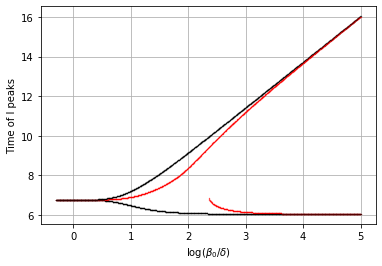

In [25]:
x = np.linspace(-np.log10(2), 5, 1000)
deltas = 10**(-x)
yi = np.array([N/2-1, 1, 0, N/2, 0, 0])
for i in range(len(x)):
    y = odeint(dydt_2regions, yi, t, args=(N, 0, 2-deltas[i], 1, deltas[i]))
    peaks = findpeaks(y[:, 1]+y[:, 4])
    peaks1 = findpeaks(y[:, 1])
    peaks2 = findpeaks(y[:, 4])
    plt.plot([x[i]]*len(peaks), peaks, 'o', color='red', markersize=0.3)
    plt.plot([x[i]]*len(peaks1), peaks1, 'o', color='black', markersize=0.3)
    plt.plot([x[i]]*len(peaks2), peaks2, 'o', color='black', markersize=0.3)
plt.grid()
plt.xlabel(r'$\log(\beta_0/\delta)$')
plt.ylabel('Time of I peaks')
plt.show()

# epsilon = 0.5일 때 delta 변화시키기

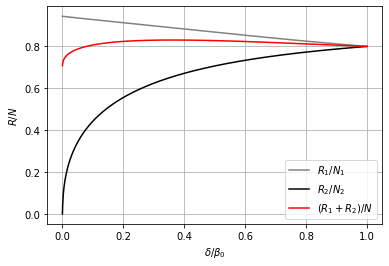

In [26]:
epsilon = 0.5
yi = np.array([N*(1+epsilon)/2-1, 1, 0, N*(1-epsilon)/2, 0, 0])

deltas1 = np.linspace(0, 2, 1000)
R1, R2 = [], []
for delta in deltas1:
    y = odeint(dydt_2regions, yi, t, args=(N, epsilon, 2-delta, 1, delta))
    R1.append(y[-1, 2])
    R2.append(y[-1, 5])
R1 = np.array(R1)
R2 = np.array(R2)
R = R1+R2
plt.plot((deltas1/2), R1/(N*(1+epsilon)/2),'-', color='gray', label = r'$R_1/N_1$')
plt.plot((deltas1/2), R2/(N*(1-epsilon)/2),'-', color='black', label = r'$R_2/N_2$')
plt.plot((deltas1/2), R/1000,'-', color='red', label = r'$(R_1+R_2)/N$')
plt.grid()
plt.xlabel(r'$\delta/\beta_0$')
plt.ylabel(r'$R/N$')
plt.legend()
plt.show()

# delta=0.02일때 epsilon 변화시키기

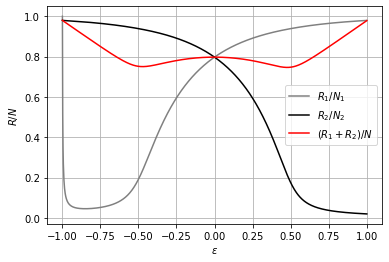

In [27]:
delta = 0.02
epsilons = np.linspace(-0.998, 0.998, 1000)
R1, R2, R = [], [], []
for epsilon in epsilons:
    yi = np.array([N*(1+epsilon)/2-1, 1, 0, N*(1-epsilon)/2, 0, 0])
    y = odeint(dydt_2regions, yi, t, args=(N, epsilon, 2-delta, 1, delta))
    R1.append(y[-1, 2]/(N*(1+epsilon)/2))
    R2.append(y[-1, 5]/(N*(1-epsilon)/2))
    R.append((y[-1, 2]+y[-1, 5])/N)
plt.plot(epsilons, R1,'-', color='gray', label = r'$R_1/N_1$')
plt.plot(epsilons, R2,'-', color='black', label = r'$R_2/N_2$')
plt.plot(epsilons, R,'-', color='red', label = r'$(R_1+R_2)/N$')
plt.grid()
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'$R/N$')
plt.legend()
plt.show()